## PREDICTION OF SYRIATEL COMPANY CUSTOMER CHURN

##### Author: Nelson Kibet kemboi

## Business Understanding 

Due to increased competition in telecommunication industry there as been concerns on predicting the customer churn in order to retain customers. In order to maintain competitive parity by SyriaTel company customer retention is a key to the business. Since retaining customers will be cheaper than acquiring new ones it is therefore paramount to deduce ways of making sure customers are not lost by the SyriaTel company. By analyzing various data points and using predictive analytics, SyriaTel company will identify patterns and indicators that help them anticipate customer behavior and take proactive measures to reduce churn rates. Therefore SyriaTel is seeking to models that will predict whether customers are likely to churn or not hence taking a proactive measures to retain them.data on demographics like location and usage patterns like calls, charge etc will be used to analyze and build predictive machine learning models, hence SeriaTel must continuously adapt its models to reflect changing customer behavior and market dynamics to ensure its retention strategies remain effective.
 
### Objectives 
* Create machine learning models that can predict customer churn by using data to analyze customer features.
* Comparing the build machine learning models and determine the most accurate model in prediction.  
* The analysis aims to identify the specific features that have a significant impact on the customer churn rate in SyriaTel, provide valuable recommendations based on the findings hence help to mitigate churn rates in the company and improve customer retention. 


## Data Understanding 
This helps to us to acquire knowledge and comprehension about this dataset before further analysis and modeling.

In [1]:
#importing relevant libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [2]:
#reading the csv file to read and check the data 
seriatel_df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
seriatel_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# checking for data information 
seriatel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

* Churn column is boolean and is supposed to be converted to numeric
* international plan and voice mail plan are objects and need to be converted to numeric


### Modifying column Data types 

#### Checking for duplicates and NaN values


In [4]:
#creating a function to convert boolean to numeic 
def encode(column):
    le = LabelEncoder()
    seriatel_df[column] = le.fit_transform(seriatel_df[column])
    

In [5]:
# encording the column 
encode('churn') 
encode('international plan')
encode('voice mail plan')

In [6]:
#checking for missing values 
seriatel_df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
#checking for duplicates 
seriatel_df.duplicated().value_counts()

False    3333
dtype: int64

As seen from the checklist above we have no mising values, nor duplicates hence clean for analysis

### Exploratory Data Analysis

In [8]:
# getting basic statistics of our dataset 
seriatel_df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


* From the basic statistics it can be seen that there are no outliers but cna be further checked using the boxplot 


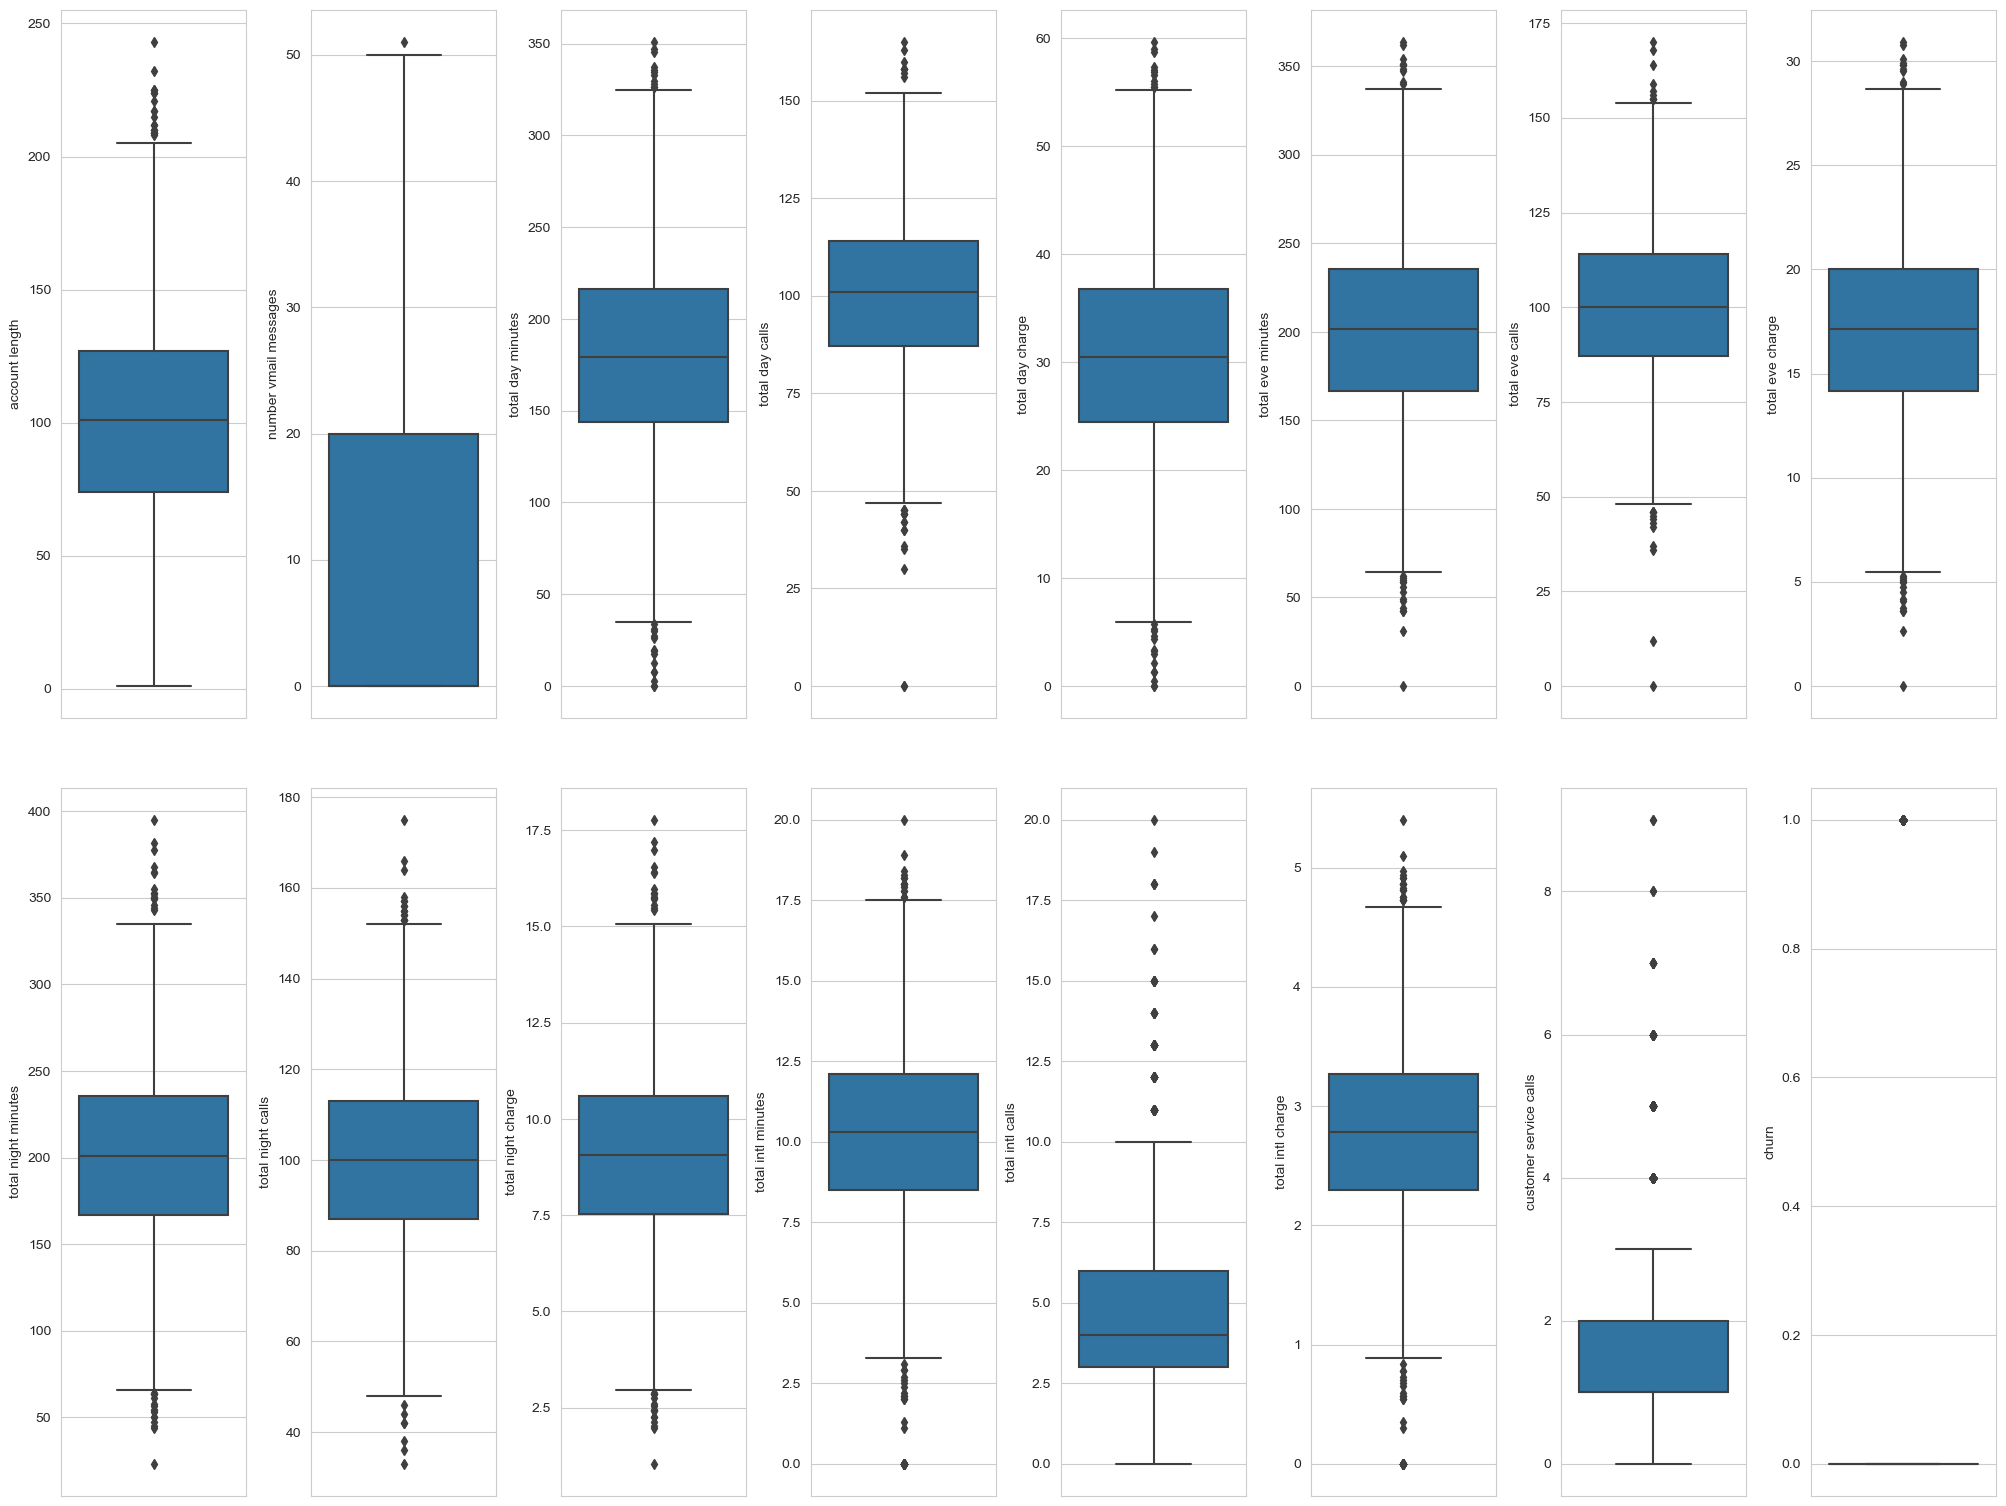

In [14]:
#checking for any outliners in the dataset using box plot 
#creating new dataframe for checking outliers 
new_df = seriatel_df.copy()
new_df = new_df.drop(columns=['state', 'voice mail plan', 'international plan', 'phone number', 'area code'], axis=1)
# visualizing with matplotlib and seaborn 
sns.set_style('whitegrid')
fig,ax = plt.subplots(ncols=8,nrows =2,figsize = (20,15))
index = 0 
ax = ax.flatten()
for col,value in new_df.items():
    sns.boxplot(y = col,data = new_df,ax = ax[index])
    index += 1
plt.tight_layout(pad= 0.5,w_pad= 0.7,h_pad=5.0);



In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   number vmail messages   3333 non-null   int64  
 2   total day minutes       3333 non-null   float64
 3   total day calls         3333 non-null   int64  
 4   total day charge        3333 non-null   float64
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total eve charge        3333 non-null   float64
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total night charge      3333 non-null   float64
 11  total intl minutes      3333 non-null   float64
 12  total intl calls        3333 non-null   int64  
 13  total intl charge       3333 non-null   float64
 14  customer service calls  3333 non-null   